## Random Numbers and Probability

### Calculating probabilities

In [1]:
library(readr)

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
amir_deals <- read_csv("amirs.csv")

Rows: 178 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): product, client, status
dbl (2): amount, num_users

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:

amir_deals %>%
  count(product)

product,n
<chr>,<int>
Product A,23
Product B,62
Product C,15
Product D,40
Product E,5
Product F,11
Product G,2
Product H,8
Product I,7


Create a new column called prob by dividing n by the total number of deals Amir worked on.

In [5]:

amir_deals %>%
  count(product) %>%
  mutate(prob = n/sum(n))

product,n,prob
<chr>,<int>,<dbl>
Product A,23,0.12921348
Product B,62,0.34831461
Product C,15,0.08426966
Product D,40,0.22471910
Product E,5,0.02808989
Product F,11,0.06179775
Product G,2,0.01123596
Product H,8,0.04494382
Product I,7,0.03932584


If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

8.43%

###  Sampling deals

In [6]:

set.seed(31)


amir_deals %>%
  sample_n(5)

product,client,status,amount,num_users
<chr>,<chr>,<chr>,<dbl>,<dbl>
Product D,Current,Lost,3086.88,55
Product C,Current,Lost,3727.66,19
Product D,Current,Lost,4274.80,9
Product B,Current,Won,4965.08,9
Product A,Current,Won,5827.35,50


In [7]:

set.seed(31)


amir_deals %>%
  sample_n(5, replace=TRUE)

product,client,status,amount,num_users
<chr>,<chr>,<chr>,<dbl>,<dbl>
Product D,Current,Lost,3086.88,55
Product C,Current,Lost,3727.66,19
Product D,Current,Lost,4274.80,9
Product B,Current,Won,4965.08,9
Product A,Current,Won,5827.35,50


Spectactular sampling! It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

### Creating a probability distribution

In [11]:
restaurant_groups <- data.frame(
  group_id = c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'),
  group_size = c(2, 4, 6, 2, 2, 2, 3, 2, 4, 2)
)

In [12]:
restaurant_groups

group_id,group_size
<chr>,<dbl>
A,2
B,4
C,6
D,2
E,2
F,2
G,3
H,2
I,4


In [14]:
group_size

function (x) 
UseMethod("group_size")
<bytecode: 0x111bd5238>
<environment: namespace:dplyr>

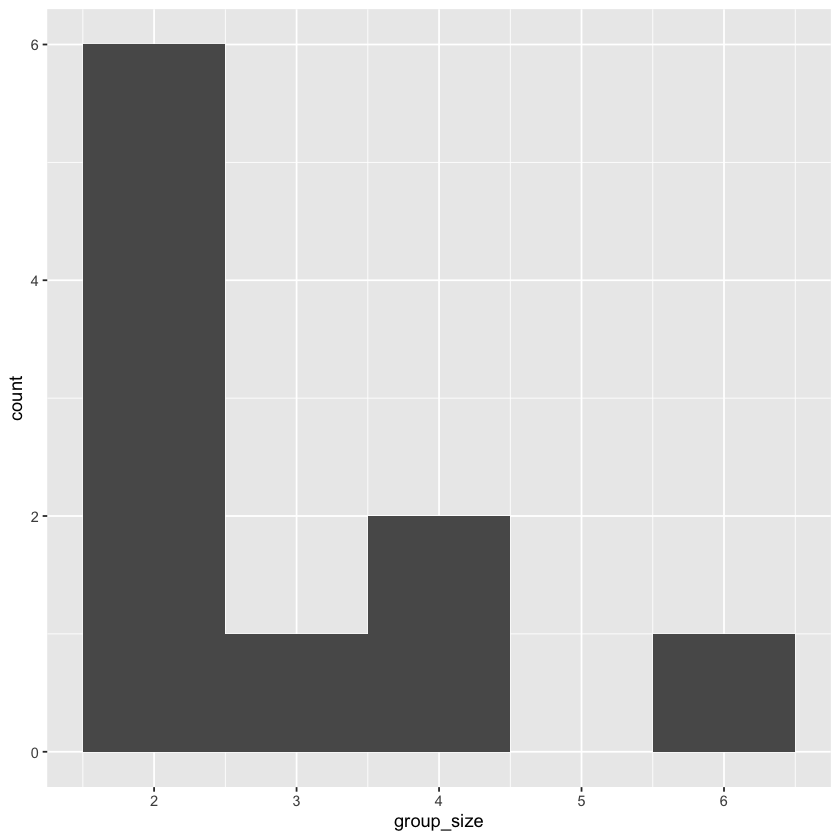

In [13]:

ggplot(restaurant_groups, aes(group_size)) +
  geom_histogram(bins = 5)

Count the number of each group_size in restaurant_groups, then add a column called probability that contains the probability of randomly selecting a group of each size. Store this in a new data frame called size_distribution.

In [15]:

size_distribution <- restaurant_groups %>%
  
  count(group_size) %>%
  
  mutate(probability = n / sum(n))

size_distribution

group_size,n,probability
<dbl>,<int>,<dbl>
2,6,0.6
3,1,0.1
4,2,0.2
6,1,0.1


In [16]:

expected_val <- sum(size_distribution$group_size *
                    size_distribution$probability)
expected_val

[1] 2.9

In [17]:

size_distribution %>%
    
    filter(group_size >= 4) %>%
    
    summarize(prob_4_or_more = sum(probability))

prob_4_or_more
<dbl>
0.3
